<a href="https://colab.research.google.com/github/2020-nlp-c/nlp-deeplearning/blob/master/jisang/14_Word2Vec_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Word2Vec 실습**

## **1. Word2Vec 구현**

In [12]:
doc = 'you will never know until you try'

In [13]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **1-1. 데이터 전처리**

In [101]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()

# 문장 전처리
def tokenize(x):
    return x.split()
words = tokenize(doc)

tmp_docs = []
# Lemmatize
for word in words:
    tmp_docs.append(wl.lemmatize(word.lower(), pos = 'v' or 'n'))
# Pos Tagging
pos_docs = pos_tag(tmp_docs)

# 불용어 처리(stopWord)
stopPos = ['CC']
stopWord = [',']

docs_tokens = []
tokens = []

for pos_doc in pos_docs:
    # 불용 품사 지정
    if pos_doc[1] not in stopPos:
        # 불용어 지정
        if pos_doc[0] not in stopWord:
            # 문서 사용 단어
            docs_tokens.append(pos_doc[0])

# 전체 사용 단어
tokens = list(set(docs_tokens))

docs_tokens, tokens

(['you', 'will', 'never', 'know', 'until', 'you', 'try'],
 ['until', 'try', 'know', 'never', 'will', 'you'])

In [102]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 문자열 라벨링
label_enc = LabelEncoder()
label_docs = label_enc.fit_transform(docs_tokens)
# 바이너리 인코딩
onehot_enc = OneHotEncoder(sparse=False)
docs_label = label_docs.reshape(len(label_docs), 1) # n:1 matrix로 변환
onehot_docs = onehot_enc.fit_transform(docs_label)
    
label_enc.inverse_transform([5]), label_enc.transform(['you'])

onehot_docs

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]])

### **1-2. Window 생성**

In [103]:
window_size = 1
x = []
y = []

for i in range(len(onehot_docs)):
    tmp = []
    for j in range(i-window_size, i+window_size + 1):
        if j < 0:
            pass
        elif j > len(onehot_docs):
            pass
        elif 0 <= j < len(onehot_docs):
            if i != j:
                tmp.append(onehot_docs[j])
    x.append(tmp)
    y.append(onehot_docs[i])

x, y

([[array([0., 0., 0., 0., 1., 0.])],
  [array([0., 0., 0., 0., 0., 1.]), array([0., 1., 0., 0., 0., 0.])],
  [array([0., 0., 0., 0., 1., 0.]), array([1., 0., 0., 0., 0., 0.])],
  [array([0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0.])],
  [array([1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1.])],
  [array([0., 0., 0., 1., 0., 0.]), array([0., 0., 1., 0., 0., 0.])],
  [array([0., 0., 0., 0., 0., 1.])]],
 [array([0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 1., 0.]),
  array([0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 1.]),
  array([0., 0., 1., 0., 0., 0.])])

### **1-3. Feed Foward**

In [104]:
k = 4

# X to Hidden Layer Weight
x2h = np.random.rand(len(tokens), k)
# Hidden Layer to Y Weight
h2y = np.random.rand(k, len(tokens))

hidden = []
for words in x:
    tmp = []
    for word in words:
        tmp.append(np.dot(x2h.T, word.T))
    hidden.append(tmp)

def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

y_predict = []
for words in hidden:
    tmp = []
    for word in words:
        tmp.append(softmax(np.dot(h2y.T, word)))
    y_predict.append(tmp)

hidden, y_predict

([[array([0.72970348, 0.32447501, 0.44634518, 0.88234414])],
  [array([0.30761346, 0.83321515, 0.71273927, 0.90391157]),
   array([0.53302861, 0.85609795, 0.02766275, 0.24314283])],
  [array([0.72970348, 0.32447501, 0.44634518, 0.88234414]),
   array([0.82640854, 0.97962196, 0.9062349 , 0.31222941])],
  [array([0.53302861, 0.85609795, 0.02766275, 0.24314283]),
   array([0.9604504 , 0.92983219, 0.46588585, 0.93577407])],
  [array([0.82640854, 0.97962196, 0.9062349 , 0.31222941]),
   array([0.30761346, 0.83321515, 0.71273927, 0.90391157])],
  [array([0.9604504 , 0.92983219, 0.46588585, 0.93577407]),
   array([0.80062386, 0.45316813, 0.87202302, 0.32035027])],
  [array([0.30761346, 0.83321515, 0.71273927, 0.90391157])]],
 [[array([0.16237503, 0.19945652, 0.174693  , 0.19113796, 0.17723433,
          0.09510316])],
  [array([0.16297551, 0.17665972, 0.13061324, 0.23516236, 0.21227977,
          0.08230941]),
   array([0.12623359, 0.15729578, 0.18079359, 0.21209712, 0.20860824,
          0.1

### **1-4. Loss 계산**

In [105]:
loss = []
for predict in y_predict:
    tmp = []
    for j in range(len(predict)):
        tmp.append(np.log(predict[j]) * y[i])
    loss.append(np.sum(tmp))
loss = -np.sum(loss)
loss

21.084478866546398

### **1-5. Back Propagation**

In [58]:
alpha = 0.01
diff = []
h_layer = []
x_layer = []

for i in range(len(y)):
    for j in range(len(y_predict[i])):
        diff.append(y_predict[i][j] - y[i])
        h_layer.append(hidden[i][j])
        x_layer.append(x[i][j])

h2y = h2y - alpha*np.dot(np.matrix(h_layer).T, np.matrix(diff))
x2h = x2h - np.dot(np.matrix(x_layer).T, np.dot(h2y, np.matrix(diff).T).T)

np.array(h2y), np.array(x2h

(array([[0.80169339, 0.76780406, 0.07675191, 0.2731178 , 0.55032861,
         0.82780191],
        [0.07021935, 0.34295988, 0.31749778, 0.30611318, 0.82239916,
         0.95052085],
        [0.78141985, 0.94735418, 0.3850283 , 0.97586688, 0.64185778,
         0.7127623 ],
        [0.64621189, 0.55805259, 0.16680369, 0.44529688, 0.15970663,
         0.66444265]]),
 array([[-0.4633492 , -1.00943364,  2.33849919,  0.60433932],
        [ 0.83898332, -0.08174132, -0.03381773, -0.02849969],
        [ 1.42975708,  2.01444736,  0.21468681,  1.4644484 ],
        [ 2.13768412,  0.49779953,  0.44330413,  1.80504363],
        [ 1.9283531 ,  1.59863847,  1.12513142,  1.62231672],
        [-3.57553957, -0.02662526, -0.84815106, -1.96829643]]))

### **1-6. 예측 결과값 출력**

In [70]:
import pandas as pd

index_name = []
for i in range(len(tokens)):
    index_name.append(label_enc.inverse_transform([i])[0])

pd.DataFrame(x2h, index_name)

,0,1,2,3
know,-0.463349,-1.009434,2.338499,0.604339
never,0.838983,-0.081741,-0.033818,-0.028500
try,1.429757,2.014447,0.214687,1.464448
until,2.137684,0.497800,0.443304,1.805044
will,1.928353,1.598638,1.125131,1.622317
you,-3.575540,-0.026625,-0.848151,-1.968296


## **2. Word2Vec 클래스화**

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### **2-1. Word2Vec 클래스**

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import argmax
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

class Word2Vec():
    def __init__(self):
        self.stopPos = ['CC']
        self.stopWord = [',']
        self.docs_tokens = []
        self.tokens = []
        self.index_name = []
        self.onehot_docs = []
        self.x = []
        self.y = []
        self.x2h = []
        self.h2y = []
        self.hidden = []
        self.y_predict = []
        self.loss = []

    # 문장 전처리
    def wrod_preprocessing(self, doc):
        wl = WordNetLemmatizer()
        # 띄어쓰기 기준으로 토큰화
        def tokenize(x):
            return x.split()
        words = tokenize(doc)
        # Lemmatize
        tmp_docs = []
        for word in words:
            tmp_docs.append(wl.lemmatize(word.lower(), pos = 'v' or 'n'))
        # Pos Tagging
        pos_docs = pos_tag(tmp_docs)
        # 불용어 처리(stopWord)
        for pos_doc in pos_docs:
            # 불용 품사 지정
            if pos_doc[1] not in self.stopPos:
                # 불용어 지정
                if pos_doc[0] not in self.stopWord:
                    # 문서 사용 단어
                    self.docs_tokens.append(pos_doc[0])
        # 전체 사용 단어
        self.tokens = list(set(self.docs_tokens))
        
        return self.docs_tokens, self.tokens

    # 라벨링
    def labeling_word(self):
        # 문자열 라벨링
        label_enc = LabelEncoder()
        label_docs = label_enc.fit_transform(self.docs_tokens)
        # 바이너리 인코딩
        onehot_enc = OneHotEncoder(sparse=False)
        docs_label = label_docs.reshape(len(label_docs), 1) # n:1 matrix로 변환
        self.onehot_docs = onehot_enc.fit_transform(docs_label)
        # 문자 라벨 순서 저장
        for i in range(len(self.tokens)):
            self.index_name.append(label_enc.inverse_transform([i])[0])

        return self.onehot_docs, self.index_name

    # window 생성
    def make_window(self, window_size):
        for i in range(len(self.onehot_docs)):
            tmp = []
            for j in range(i-window_size, i+window_size + 1):
                if j < 0:
                    pass
                elif j > len(self.onehot_docs):
                    pass
                elif 0 <= j < len(self.onehot_docs):
                    if i != j:
                        tmp.append(self.onehot_docs[j])
            self.x.append(tmp)
            self.y.append(self.onehot_docs[i])

        return self.x, self.y

    # Weight 생성
    def make_weight(self, k):
        # X to Hidden Layer Weight
        self.x2h = np.random.rand(len(self.tokens), k)
        # Hidden Layer to Y Weight
        self.h2y = np.random.rand(k, len(self.tokens))

        return self.x2h, self.h2y

    # Feed Foward
    def predict_Y(self):
        # X to Hidden Layer 과정
        tmp_hidden = []
        for words in self.x:
            tmp = []
            for word in words:
                tmp.append(np.dot(self.x2h.T, word.T))
            tmp_hidden.append(tmp)
        self.hidden = tmp_hidden

        # SoftMax 함수
        def softmax(a) :
            return np.exp(a) / np.sum(np.exp(a))

        # Hidden Layer to Y
        tmp_predict = []
        for words in self.hidden:
            tmp = []
            for word in words:
                tmp.append(softmax(np.dot(self.h2y.T, word.T)))
            tmp_predict.append(tmp)
        self.y_predict = tmp_predict

        # Loss 값
        loss_tmp = []
        for predict in self.y_predict:
            tmp = []
            for j in range(len(predict)):
                tmp.append(np.log(predict[j]) * self.y[i])
            loss_tmp.append(np.sum(tmp))
        self.loss = loss_tmp
        self.loss = -np.sum(self.loss)
        
        return self.hidden, self.y_predict, self.loss

    # Back Propagation 구현
    def back_propagation(self, alpha):
        diff = []
        h_layer = []
        x_layer = []
        for i in range(len(self.y)):
            for j in range(len(self.y_predict[i])):
                diff.append(self.y_predict[i][j] - self.y[i])
                h_layer.append(self.hidden[i][j])
                x_layer.append(self.x[i][j])

        # Weight 갱신
        self.h2y = self.h2y - alpha * np.dot(np.matrix(h_layer).T, np.matrix(diff))
        self.x2h = self.x2h - alpha * np.dot(np.matrix(x_layer).T, np.dot(self.h2y, np.matrix(diff).T).T)
        self.h2y = np.array(h2y) # array로 재설정 안 할 경우, 무한히 matrix가 커지는 현상 발생
        self.x2h = np.array(x2h)

        return self.h2y, self.x2h

    # 자동 실행
    def run(self, doc, window_size, k, alpha, epochs):
        self.wrod_preprocessing(doc)
        self.labeling_word()
        self.make_window(window_size)
        self.make_weight(k)
        L1 = 0
        count_epoch = 0
        loss_history = []
        count_history = []
        for i in range(epochs):
            self.predict_Y()
            self.back_propagation(alpha)
            L1 = self.loss.copy()
            count_epoch += 1
            count_history.append(count_epoch)
            loss_history.append(self.loss)
        print("반복횟수 : {}".format(count_epoch))
        print("Loss : {}".format(self.loss))
        print("예측 결과 :")
        print(pd.DataFrame(self.x2h, index_name))
        plt.plot(count_history, loss_history)
        plt.title("Loss History")
        plt.show()

### **2-2. 클래스 결과 확인**

In [107]:
w2v = Word2Vec()

In [108]:
doc = 'you will never know until you try'

반복횟수 : 10000
Loss : 21.084478866546398
예측 결과 :
              0         1         2         3
know   0.826409  0.979622  0.906235  0.312229
never  0.533029  0.856098  0.027663  0.243143
try    0.800624  0.453168  0.872023  0.320350
until  0.960450  0.929832  0.465886  0.935774
will   0.729703  0.324475  0.446345  0.882344
you    0.307613  0.833215  0.712739  0.903912


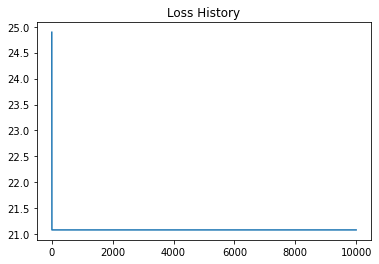

In [109]:
w2v.run(doc, 1, 4, 0.01, 10000) # 결과가 좋지 못한것으로 보아 Loss를 계산하는 과정에 문제가 있는 것 같습니다.